# Homework 01

## 01 Connected components 

$$
n-c \leq m
$$

We can prove that, by looking at increasing numbers of nodes, startig by 0.  
- If we have 1 node, $1-1 == 0$, which holds.
- $c = 1$ gives us 2 nodes with one connection between them, giving us a chain. $2-1 = 1$
- Higher numbers of $c$ give us $n-c$ eges minimum, so the equality holds for arbitrary number c.

$$
m \leq \binom{n-c+1}{2}
$$

## 03 Random node selection

### Instructions
Erdos-Renyi graph model requires efficient implementation of a random selection of
nodes, which can be easily achieved with most network representations. More realistic models require more sophisticated random selection procedures and associated network representations.
Design an algorithm that does not select the nodes uniformly at random, but proportional
to their degree.  
More precisely, the node i should be selected with the probability $\frac{k_i}{2m}$, where $k_i$ is its degree and $m$ is the number of edges. The algorithm must run in constant time O(1),
while you can assume any standard network representation. (Think more about the network
representation than the algorithm.)



### Implementation
The base idea is to sample random endges, which will give us selection probability proportional to the node degree.  
If we represent the graph in the edge-list format, we can use the internal  representation of the graph as an efficiet data structure for our alogorithm.  
For easier unerstaing I wrote the pseudocode (python):  
```py
def get_random_node(G:graph):
  # generate index - O(1)
  random_index = random.randint(0, len(graph.edges))
  # get the edge
  rand_edge = G.edges[random_index]
  # this gives us probability for selecting a node i, proportional to the degree
  # to get a node from the edge we got,  we pick a node from either end at random

  if(random.rand() > 0.5): # gives us 1/2 probability of selection
    return rand_edge.get_nodes()[0]
  else:
    return rand_edge.get_nodes()[1]
```

For the sake of simplicity, some functions are assumed to exist.  
Formula:
$$
p(i) = \frac{k_i}{m} * \frac{1}{2} = \frac{k_1}{2m}
$$

## 04 Weak & Strong connectivity

### Instructions
Depth-first search is the most efficient algorithm for finding connected components of undirected
networks.
- What would the same algorithm find in a directed network if one would follow the
links in any direction?
- What would the algorithm find if one would follow the links only in
the right direction?
- What would the algorithm find if one would follow the links only in the
opposite direction?

Based on your answers design an algorithm for finding strongly connected components in
directed networks. Implement the algorithm and find strongly connected components of Enron
e-mail communication network

Compute the number of strongly connected components and the size of the largest one. Are
the results expected?

In [ ]:
!wget http://lovro.fri.uni-lj.si/ina/nets/enron.net

### implementation

In [2]:
import networkx as nx
import glob
import random
from collections import deque
import matplotlib.pyplot as plt
import numpy as np

In [2]:
enron = nx.read_pajek("enron.net") # read the graph
G = nx.convert_node_labels_to_integers(enron) #convert lables

In [ ]:
#  compute all nodes
def connected(G:nx.Graph, N:set[int], initial_node:int):
    C = []
    S = []
    N.remove(initial_node)
    S.append(initial_node)
    while S: # while there are some not yet processe nodes, expend one
        curr_node = S.pop() # get the node out of the queue
        C.append(curr_node) # add it to the nodes in a component
        for neigh in G[curr_node]: # for every neighbour of curr_node
            if neigh in N: # if neigh is in N
                N.remove(neigh) # remove it from nodes that we must process
                S.append(neigh) # target it for expansion
    return C # return all ids in a component

# test implementation
# display(connected(G, set(G.nodes), 1))

# strongly connected
# implementation with edge reversal.
# compute the connected component and store the nodes in a set.
# compute the connected comp. but reverse all the edges.
# intersection of both sets will have all the nodes that can be reached either from this node AND by comming to this node from somewhere.

def strong_connected(G:nx.DiGraph): # DiGraph, to get the correct typehinting
    # https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.reverse.html
    reverse_G = G.reverse(copy=True)
    strong_components = []
    N = set(G.nodes)
    while N:
        curr_node = next(iter(N))
        # normal pass
        component = connected(G, N.copy(), curr_node)
        # reverse pass
        reverse_component = connected(reverse_G, N.copy(), curr_node)
        # intersection compute
        node_intersection = set(component) & set(reverse_component)
        # add components
        strong_components.append(node_intersection)
        # remove from nodes to explore
        N -= node_intersection

    return strong_components

# test implementation
# display(strong_connected(G))



In [14]:
strong_components = strong_connected(G) 
print(f'Number of strongly connected components: {len(strong_components)}')
print(f'Size of the largest strong component: {len(sorted(strong_components, key=lambda x: len(x), reverse=True)[0])}')

Number of strongly connected components: 78058
Size of the largest strong component: 9164


### Answer

- DFS would find the weakly connected component in the graph, by following all directions from a node.  
- DFS would find all components that are **reachable** from a given node.
- DFS would find all components from which a give node **can be reachedd from**.

Strongly connected components are those that can `reach eachother`. This is the intersection of last two anwers.


# 05 Is Java software scale-free

## Instructions
Consider a software class dependency network representing Lucene search engine (Figure 1). This is a directed network where node $i$ links to node $j$ if the software class represented by $i$ depends on or uses the class represented by $j$.  

![java graph](images/javaGraph.png)

- Compute the degree distribution $p_k$ and plot it on a log-log plot by representing each distinct ($k$, $pk$) with a single dot, $k > 0$.  
  - (Transformation to logarithmic axes should be done by your plotting software.) 
- Compute also the in-degree distribution $pk_{in}$
- the out-degree distribution $pk_{out}$
- superimpose them on the same plot using dots of different colors.
- Compare all three degree distributions $pk$
  -  and highlight the differences between them.
  -  Do the distributions appear to be scale-free, following a power-law $k^{-\lambda}$?
-  For the distribution that not to appear like a power-law, reason why.
-  For the distributions that do seem to follow a power-law, reason why and compute their power-law exponent $\lambda$· using the maximum likelihood formula

In [ ]:
# use wget to download
!wget http://lovro.fri.uni-lj.si/ina/nets/lucene.net

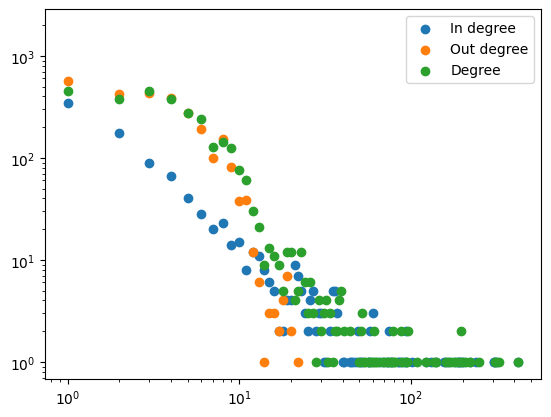

In [36]:
# read graph
G:nx.DiGraph = nx.read_pajek('lucene.net')

# compute in, out and degree of each node
stats = {
  "In degree":[],
  "Out degree":[],
  "Degree": []
} 
for curr_node in G:
  stats["Degree"].append(G.degree(curr_node))
  stats["In degree"].append(G.in_degree(curr_node))
  stats["Out degree"].append(G.out_degree(curr_node))

# plotting
for name, counts in stats.items():
  degree, num_occourances = np.unique(np.array(counts), return_counts=True)
  plt.scatter(degree, num_occourances, label=name)
  # y_intercept, k  = np.polyfit(np.log(degree[1:]), np.log(num_occourances[1:]), 1)
  # xs = np.linspace(degree[1],degree[-1], 10)
  # ys = k * xs + y_intercept
  # plt.plot(xs,xs, label=f"{name} fit")

plt.legend()
plt.yscale("log")
plt.xscale("log")

In [40]:
MIN_K = 5

def power_law_gamma(degrees):
  k = np.array(degrees)
  k = k[k >= MIN_K] # threshold out the MIN_K
  return 1 + (len(k) / np.sum(np.log(k / (MIN_K - 0.5))))


for name, counts in stats.items():
  degree, num_occourances = np.unique(np.array(counts), return_counts=True)
  print(f"Distribution: {name}, γ: {power_law_gamma(degree)}")

Distribution: In degree, γ: 1.4165401703689287
Distribution: Out degree, γ: 2.019228077103455
Distribution: Degree, γ: 1.4175204029217188


### Answers
- `In degree` (blue) follows the powerlaw distribution. It make sense that there are some huge libraries that almost everyone uses (think numpy) and a lot of specific small ones that are very unpopular (hubs).
- `Out degree` (orange) doesnt follow the powerlaw. Packages almost always depend on some other packages since coding from scratch is tough. It also makes sense that the after some threshold we see almost no packages. This makes sense since we want to keep the dependency count as low as possible for a variety of practical purposes.
- `Degree` (green) doesnt follow the powerlaw either, for reasons mentioned in out degree section. We can see that there is a small amount of really large projects, which have a large amount of dependencies and dependees (I dont program in java, but Pytorch would seem like a python analog of such library)

In [6]:

networks = [i for i in glob.glob("./networks/*.adj")]

def distance(G, i):
  D = [-1] * len(G) # D = {}
  Q = deque()
  D[i] = 0
  Q.append(i)
  while Q:
    i = Q.popleft()
    for j in G[i]:
      if D[j] == -1: # if j not in D:
        D[j] = D[i] + 1
        Q.append(j)
  return [d for d in D if d > 0]

def distances(G):
  D = []
  for i in random.sample(list(G.nodes()), 30):
    D.append(distance(G, i))
  return D

def info(G):
  print("{:>10s} | '{:s}'".format('Graph', G.name))

  n = G.number_of_nodes()
  n0, n1, delta = 0, 0, 0
  print("{:>10s} | {:,d} ({:,d}, {:,d})".format('Nodes', n, n0, n1))

  m = G.number_of_edges()
  print("{:>10s} | {:.2f} ({:,d})".format('Degree', 2 * m / n, delta))

  D = distances(G)
  D = [i for d in D for i in d]

  print("{:>10s} | {:.2f} ({:,d})".format('Distance', sum(D) / len(D), max(D)))

  avg_cluster = nx.average_clustering(nx.Graph(G))
  print(f"avg clustering: {avg_cluster}")

  largest_cc = max(nx.connected_components(G), key=len)
  print(f"Largest cc: {len(largest_cc)} being {n / len(largest_cc) * 100}% of the graph")

  h, a = nx.hits(G, tol=10e-2)
  h_m = max(h, key = lambda x: h[x])
  hub_size = len(list(G.neighbors(h_m)))
  print(f"Hub size {hub_size}")

In [7]:
for name in networks:
  G = nx.read_edgelist(name)
  G_ud = nx.read_edgelist(name ,create_using=nx.DiGraph)
  # by comparing edge count we can determine if a graph is directed or not
  if(G.number_of_edges() == G_ud.number_of_edges()):
    print(f"type: UNDIRECTED")
  else:
    print(f"type:   DIRECTED")


  G = nx.convert_node_labels_to_integers(G, label_attribute = 'label')
  G.name = name
  info(G)
  
  print("--------------------------------")

type:   DIRECTED
     Graph | './networks/network_1.adj'
     Nodes | 291,934 (0, 0)
    Degree | 7.10 (0)
  Distance | 6.24 (13)
avg clustering: 0.25394067066706016
Largest cc: 291934 being 100.0% of the graph
Hub size 10721
--------------------------------
type: UNDIRECTED
     Graph | './networks/network_2.adj'
     Nodes | 189,207 (0, 0)
    Degree | 7.44 (0)
  Distance | 6.21 (10)
avg clustering: 3.437215379691078e-05
Largest cc: 189207 being 100.0% of the graph
Hub size 21
--------------------------------
type: UNDIRECTED
     Graph | './networks/network_3.adj'
     Nodes | 94,093 (0, 0)
    Degree | 16.29 (0)
  Distance | 4.34 (12)
avg clustering: 0.0
Largest cc: 94093 being 100.0% of the graph
Hub size 340
--------------------------------
type:   DIRECTED
     Graph | './networks/network_4.adj'
     Nodes | 202,275 (0, 0)
    Degree | 5.03 (0)
  Distance | 6.34 (18)
avg clustering: 0.07978452668214911
Largest cc: 202275 being 100.0% of the graph
Hub size 2803
------------------

## Answer

We can se that some graphs are directe and some not. We know that directed graphs can be either `citation` or `web`. 
Based on the hub size, we can decide that:
- 1 is `citation`
- 4 is `web`

We know that IMDB will have some clusters of people so we anticipate some non zero clustering. This gives us 
- 5 is `imdb`

I assume that given that clustering is 0 in bipartite graphs, this should be true for FLICKR.
- 3 is `flickr`

giving us erdos reny model:
- 2 is`erodos reny`

# 07 Who to vaccinate

## Question
The probability that an individual would spread some viral disease through her/his social network is proportional to $k^2$, where $k$ is the degree of the corresponding node.  
Consider two immunization schemes for preventing the spread of diseases. In the first scheme, you randomly select some number of individuals and vaccinate them. In the second scheme, you first select the same individuals, but then rather vaccinate a random acquaintance
of theirs.

- Which of the two schemes will provide better immunization? Why?

## Answer

The answer is based on the `friends of friends` phenomenon observed in social networks.  
It is better to vaccinate a `random friend` of random people, since there is a high chance that the selected friend has a lot of other friends (high degree).  
To maximize efficiency we want to vaccinate popular people (hubs in social networks) that could recieve the infection by more people and then give it to more people.  